In [1]:
import psychrnn
from psychrnn.tasks import rdm as rd
from psychrnn.backend.models.basic import Basic

import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

define params globally first before passing to RDM, mess w/ model params and explain what can do. (can turn on and off dale's law). some masking, input output connectivity. train_params variables stuff

In [2]:
dt = 10 # time-step
tau = 100 # intrinsic time constant of neural state decay
T = 2000 # time to run for (number of steps is T/dt)
N_batch = 50 # number of trials per training step
N_rec = 50 # number of recurrent units
name = 'basicModel'

In [3]:
rdm = rd.RDM(dt = dt, tau = tau, T = T, N_batch = N_batch)

RDM puts the params passed in as well as other generated params into a dict we can then use to create our model. 

In [4]:
params = rdm.__dict__
print(params)

{'N_batch': 50, 'N_in': 2, 'N_out': 2, 'dt': 10, 'tau': 100, 'T': 2000, 'alpha': 0.1, 'N_steps': 200, 'coherence': None}


Generate *N_batch* trials to be used in training

In [5]:
gen = rdm.batch_generator()

We add in a few params that Basic(RNN) needs but that RDM doesn't generate for us.

In [6]:
params['name'] = name #Used to scope out a namespace for global variables.
params['N_rec'] = N_rec

There are some other optional parameters we can add in:

In [7]:
params['dale_ratio'] = None # Default: None -- when the dale_ratio is set, dale's law is applied
params['rec_noise'] = 0.0 # Default: 0.0 -- how much noise to add to the new_state calculation
params['W_in_train'] = True # Indicates whether W_in is trainable. Default: True
params['W_rec_train'] = True # Indicates whether W_rec is trainable. Default: True
params['W_out_train'] = True # Indicates whether W_out is trainable. Default: True
params['b_rec_train'] = True # Indicates whether b_rec is trainable. Default: True
params['b_out_train'] = True # Indicates whether b_out is trainable. Default: True
params['init_state_train'] = True # Indicates whether init_state is trainable. Default: True
params['load_weights_path'] = None # When given a path, loads weights from file in that path. Default: None

Instantiate our model

In [8]:
basicModel = Basic(params)

{'N_batch': 50, 'N_in': 2, 'N_out': 2, 'dt': 10, 'tau': 100, 'T': 2000, 'alpha': 0.1, 'N_steps': 200, 'coherence': None, 'name': 'basicModel', 'N_rec': 50, 'dale_ratio': None, 'rec_noise': 0.0, 'W_in_train': True, 'W_rec_train': True, 'W_out_train': True, 'b_rec_train': True, 'b_out_train': True, 'init_state_train': True, 'load_weights_path': None, 'parent': True}


Start a tensorflow session with loss, regularization, predictions, and regularized loss defined.

In [9]:
basicModel.build()

Set the training parameters for our model. All of the parameters below are optional.

In [10]:
train_params = {}
train_params['save_weights_path'] =  '../weights/refactor_weights.npz' # Where to save the model after training. Default: None
train_params['training_iters'] = 100000 # number of iterations to train for Default: 10000
train_params['learning_rate'] = .001 # Sets learning rate if use default optimizer Default: .001
train_params['loss_epoch'] = 10 # Compute and record loss every 'loss_epoch' epochs. Default: 10
train_params['verbosity'] = True # If true, prints information as training progresses. Default: True
train_params['save_training_weights_epoch'] = 100 # save training weights every 'save_training_weights_epoch' epochs. Default: 100
train_params['training_weights_path'] = None # where to save training weights as training progresses. Default: None
train_params['curriculum'] = None # curriculum object, when not none, trains using curriculum learning. Replaces trial_batch_generator when not None. Default: None
train_params['optimizer'] = tf.train.AdamOptimizer(learning_rate=train_params['learning_rate']) # What optimizer to use to compute gradients. Default: tf.train.AdamOptimizer(learning_rate=train_params['learning_rate'])
train_params['clip_grads'] = True # If true, clip gradients by norm 1. Default: True

Train our model.

In [11]:
basicModel.train(gen, train_params)

Iter 500, Minibatch Loss= 0.255080
Iter 1000, Minibatch Loss= 0.201375
Iter 1500, Minibatch Loss= 0.148594
Iter 2000, Minibatch Loss= 0.132121
Iter 2500, Minibatch Loss= 0.118618
Iter 3000, Minibatch Loss= 0.101980
Iter 3500, Minibatch Loss= 0.046654
Iter 4000, Minibatch Loss= 0.042707
Iter 4500, Minibatch Loss= 0.032589
Iter 5000, Minibatch Loss= 0.021023
Iter 5500, Minibatch Loss= 0.053211
Iter 6000, Minibatch Loss= 0.018797
Iter 6500, Minibatch Loss= 0.018563
Iter 7000, Minibatch Loss= 0.024383
Iter 7500, Minibatch Loss= 0.018373
Iter 8000, Minibatch Loss= 0.018971
Iter 8500, Minibatch Loss= 0.016528
Iter 9000, Minibatch Loss= 0.016460
Iter 9500, Minibatch Loss= 0.012289
Iter 10000, Minibatch Loss= 0.009562
Iter 10500, Minibatch Loss= 0.015233
Iter 11000, Minibatch Loss= 0.010238
Iter 11500, Minibatch Loss= 0.013757
Iter 12000, Minibatch Loss= 0.009833
Iter 12500, Minibatch Loss= 0.010497
Iter 13000, Minibatch Loss= 0.008870
Iter 13500, Minibatch Loss= 0.011842
Iter 14000, Minibatch

([0.25507963,
  0.20137465,
  0.14859407,
  0.13212143,
  0.118617654,
  0.101980045,
  0.04665388,
  0.042706873,
  0.03258932,
  0.021023087,
  0.053211488,
  0.01879715,
  0.018563187,
  0.024382755,
  0.018372534,
  0.018971499,
  0.01652838,
  0.016460495,
  0.012288773,
  0.009562031,
  0.015232734,
  0.0102383755,
  0.013757089,
  0.009833223,
  0.010496724,
  0.008870359,
  0.011841507,
  0.008250112,
  0.022334652,
  0.013535227,
  0.01544227,
  0.01196922,
  0.00695764,
  0.010486921,
  0.009264185,
  0.0076525495,
  0.0075273956,
  0.007739043,
  0.011976998,
  0.008651018,
  0.014029412,
  0.008775161,
  0.00963588,
  0.0076411054,
  0.0076426803,
  0.006846988,
  0.006917697,
  0.0074264617,
  0.0059325807,
  0.0062246383,
  0.0068179895,
  0.007857046,
  0.0057303873,
  0.005441633,
  0.0047387276,
  0.005617521,
  0.0058659827,
  0.0049576624,
  0.0056905355,
  0.0052550333,
  0.0051043443,
  0.005186202,
  0.0050827903,
  0.005489329,
  0.0048733596,
  0.00473732,
  0.0

### Plot results

Extract the next trial from the generator

In [12]:
x,y,m, _ = next(gen)

Plot the x value of the trial -- for the RDM, this includes two input neurons with different coherence.

Text(0.5, 1.0, 'Input Data')

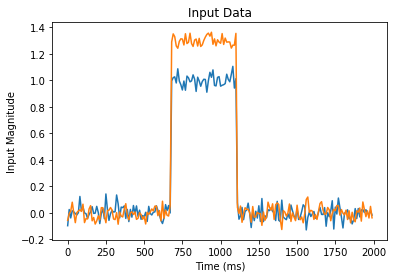

In [13]:
plt.plot(range(0, len(x[0,:,:])*dt,dt), x[0,:,:])
plt.ylabel("Input Magnitude")
plt.xlabel("Time (ms)")
plt.title("Input Data")

Run the trained model on this trial (not included in the training set).

In [14]:
results = basicModel.test(x)
output = results[0]
state_var = results[1]

Text(0.5, 1.0, 'Output on New Sample')

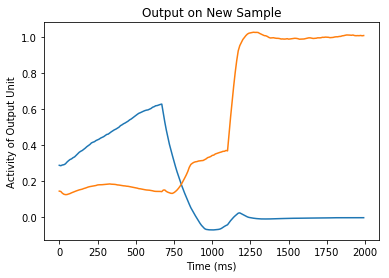

In [15]:
plt.plot(range(0, len(output[0,:,:])*dt,dt),output[0,:,:])
plt.ylabel("Activity of Output Unit")
plt.xlabel("Time (ms)")
plt.title("Output on New Sample")

Text(0.5, 1.0, 'Evolution of State Variables over Time')

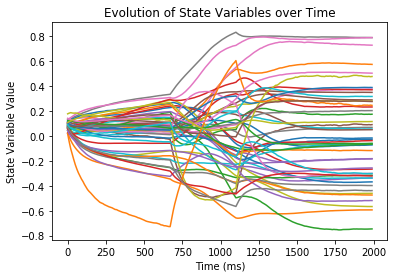

In [16]:
plt.plot(range(0, len(state_var[0,:,:])*dt,dt),state_var[0,:,:])
plt.ylabel("State Variable Value")
plt.xlabel("Time (ms)")
plt.title("Evolution of State Variables over Time")

Clean up the model to clear out the tensorflow namespace

In [17]:
basicModel.destruct()